In [0]:
# To check and confirm my zip files have been uploaded to databricks
dbutils.fs.ls("/FileStore/tables/")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/FaultDataset-1.csv', name='FaultDataset-1.csv', size=1703184, modificationTime=1680771813000),
 FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1678471465000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-1.csv', name='Occupancy_Detection_Data-1.csv', size=50968, modificationTime=1678377435000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1678218151000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1679506918000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=529

In [0]:
# Create a variable to take any uploaded file (clinicaltrial files) to ensure code automation
fileroot= "clinicaltrial_2021"

import os

os.environ['fileroot'] = fileroot

In [0]:
# Copy uploaded zip file to a driver node (local file system) to unzip using shell command.
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")


Out[3]: True

In [0]:
%sh

unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  


In [0]:
# Create a folder in databricks to hold the unziped file
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot)

Out[5]: True

In [0]:
# Move the unziped file into the created folder in databricks
dbutils.fs.mv("file:/tmp/" + fileroot + ".csv", "/FileStore/tables/" + fileroot , True)

Out[6]: True

In [0]:
# Create a variable to take uploaded pharma file to ensure code automation
pharma = "pharma"

# Copy uploaded zipped pharma file to a driver node (local file system) to unzip using shell command.
dbutils.fs.cp("/FileStore/tables/" + pharma + ".zip", "file:/tmp/")

Out[7]: True

In [0]:
import os

os.environ['pharma'] = pharma

In [0]:
%sh

unzip -d /tmp /tmp/$pharma.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
#Create a folder to hold the unzipped pharma file
dbutils.fs.mkdirs("/FileStore/tables/" + pharma)

#Move the pharma file from the tmp folder to the created pharma folder in databricks
dbutils.fs.mv("file:/tmp/" + pharma + ".csv", "/FileStore/tables/" + pharma , True)


Out[10]: True

In [0]:
#Check the files inside the pharma folder
dbutils.fs.ls("/FileStore/tables/" + pharma)


Out[11]: [FileInfo(path='dbfs:/FileStore/tables/pharma/pharma.csv', name='pharma.csv', size=678999, modificationTime=1680799827000)]

In [0]:
#View the first format of the pharma file
dbutils.fs.head("FileStore/tables/" + pharma + "/" + pharma + ".csv")

[Truncated to first 65536 bytes]
Out[12]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to in

In [0]:
#Split the pharma file into lines by the delimiter()

for line in dbutils.fs.head("FileStore/tables/" + pharma + "/" + pharma + ".csv").splitlines():
    print(line)


[Truncated to first 65536 bytes]
"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"
"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctor

In [0]:
#Create RDD from the pharma data set
myrdd_pharma = sc.textFile("FileStore/tables/" + pharma)

In [0]:
#View first 5 rows of the pharma data
myrdd_pharma.take(5)

Out[15]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the c

In [0]:
#Split the pharma dataset and extract the Parent_Company column
myrdd_pharma_parent_co = myrdd_pharma.map(lambda s:(s.split(",")[1] , 1))

In [0]:
#View the extracted Parent_Company column
myrdd_pharma_parent_co.take(5)

Out[17]: [('"Parent_Company"', 1),
 ('"Abbott Laboratories"', 1),
 ('"AbbVie"', 1),
 ('"AbbVie"', 1),
 (' Inc."', 1)]

In [0]:
#Count the rows in the Parent_Company column of the pharma data
myrdd_pharma_parent_co.count()

Out[18]: 969

In [0]:
#To remove header for parent_company row
header_pc = myrdd_pharma_parent_co.first()
parent_co_no_header = myrdd_pharma_parent_co.filter(lambda row: row != header_pc)
parent_co_no_header.take(8)

Out[19]: [('"Abbott Laboratories"', 1),
 ('"AbbVie"', 1),
 ('"AbbVie"', 1),
 (' Inc."', 1),
 ('"Johnson & Johnson"', 1),
 ('"Abbott Laboratories"', 1),
 (' Inc."', 1),
 ('"Johnson & Johnson"', 1)]

In [0]:
#Check the file inside fileroot folder in databricks
dbutils.fs.ls("/FileStore/tables/" + fileroot)

Out[20]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1680799825000)]

In [0]:
file_path = r"dbfs:/FileStore/tables/PM/TC/BERT"

In [0]:
#Check number of files in the fileroot folder
len(dbutils.fs.ls("FileStore/tables/" + fileroot))

Out[22]: 1

In [0]:
#View the first few rows of the clinical file
dbutils.fs.head("FileStore/tables/" + fileroot + "/" + fileroot + ".csv")


[Truncated to first 65536 bytes]
Out[23]: "Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unk

In [0]:
#Split the clinical file into lines by the delimiter()

for line in dbutils.fs.head("FileStore/tables/" + fileroot + "/" + fileroot + ".csv").splitlines():
    print(line)

[Truncated to first 65536 bytes]
Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions
NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||
NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|
NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|
NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|
NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|
NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate
NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|O

In [0]:
#Create an RDD for the clinical file
myrdd = sc.textFile("FileStore/tables/" + fileroot  )
myrdd.take(10)


Out[25]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|',
 'NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'NCT02752438|Ankara University|Unknown status|May 2016|Jul 

In [0]:
#To remove header row from the data
header = myrdd.first()
myrdd_no_header = myrdd.filter(lambda row: row != header)
myrdd_no_header.take(8)

Out[26]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|',
 'NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|Observational [Patient Registry]|Apr 2016|Hypoventilation|',
 'NCT02753543|

In [0]:
#Split the clinical dataset and extract the Id column
myrdd_id_no_header = myrdd_no_header.map(lambda s:(s.split("|")[0] , 1))

#Check the first 5 rows
myrdd_id_no_header.take(5)

Out[27]: [('NCT02758028', 1),
 ('NCT02751957', 1),
 ('NCT02758483', 1),
 ('NCT02759848', 1),
 ('NCT02758860', 1)]

In [0]:
# Aggregate the extracted column
myrdd_red = myrdd_id_no_header.reduceByKey(lambda a,b: a + b)

In [0]:
#Count all distinct rows of the Id column
myrdd_id_no_header.distinct().count()



Out[29]: 387261

In [0]:
#To split and extract the Type column and map each entry to 1
myrdd_type_no_header = myrdd_no_header.map(lambda s:(s.split("|")[5] , 1))


#To aggregate the count of distinct values in the column
myrdd_red = myrdd_type_no_header.reduceByKey(lambda a,b: a + b)


In [0]:
#To sort the resulting dataset by the count in descending order
sort = myrdd_red.sortBy(lambda x: x[1],  False)

#To view the result
sort.take(5)

Out[31]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

In [0]:
header = myrdd.first()
myrdd_no_header = myrdd.filter(lambda row: row != header)

#To split and extract the Condition column and filter not null rows
myrdd_no_header_con = myrdd_no_header.map(lambda s:(s.split("|")[7])).filter(lambda b: b != '')
myrdd_no_header_con.take(8)

Out[32]: ['Autistic Disorder,Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis,Lung Diseases,Pulmonary Disease',
 'Diverticular Diseases,Diverticulum,Diverticulosis',
 'Asthma',
 'Hypoventilation',
 'Lymphoma',
 'Myositis']

In [0]:
#To split where more than one condition exits and place them in individual rows and map each entry to 1
myrdd_no_header_con2 = myrdd_no_header_con.flatMap(lambda s: (s.split(","))).map(lambda s: (str(s.split(",")),1))

#To view first 8 rows
myrdd_no_header_con2.take(8)


Out[33]: [("['Autistic Disorder']", 1),
 ("['Autism Spectrum Disorder']", 1),
 ("['Diabetes Mellitus']", 1),
 ("['Tuberculosis']", 1),
 ("['Lung Diseases']", 1),
 ("['Pulmonary Disease']", 1),
 ("['Diverticular Diseases']", 1),
 ("['Diverticulum']", 1)]

In [0]:
#To aggregate the count of distinct values in the column
myrdd_red2 = myrdd_no_header_con2.reduceByKey(lambda a,b: a + b)

myrdd_red2.take(10)

Out[34]: [("['Autistic Disorder']", 867),
 ("['Autism Spectrum Disorder']", 880),
 ("['Tuberculosis']", 1118),
 ("['Lung Diseases']", 3652),
 ("['Pulmonary Disease']", 2951),
 ("['Diverticulosis']", 18),
 ("['Asthma']", 3089),
 ("['Myositis']", 108),
 ("['Hypertension']", 5364),
 ("['Periodontal Diseases']", 369)]

In [0]:
#To sort the resulting dataset by the count in descending order
sort2 = myrdd_red2.sortBy(lambda x: x[1], False)
sort2.take(5)

Out[35]: [("['Carcinoma']", 13389),
 ("['Diabetes Mellitus']", 11080),
 ("['Neoplasms']", 9371),
 ("['Breast Neoplasms']", 8640),
 ("['Syndrome']", 8032)]

In [0]:
import csv 
rdd_clinic = sc.textFile("/FileStore/tables/" + fileroot + "/" + fileroot + ".csv")
clinical_header = rdd_clinic.first()
rdd_clinical = rdd_clinic.filter(lambda s: s != clinical_header).map(lambda y: csv.reader([y], delimiter = "|").__next__())
rdd_clinical.take(100)



rdd_pharma = sc.textFile("/FileStore/tables/pharma/pharma.csv")
pharma_header = rdd_pharma.first()
rdd_pharma_ = rdd_pharma.filter(lambda s: s != pharma_header).map(lambda y: csv.reader([y], delimiter = ",").__next__())
rdd_pharma_.take(100)

Out[36]: [['Abbott Laboratories',
  'Abbott Laboratories',
  '$5,475,000',
  '$0',
  '$5,475,000',
  '2013',
  '20131227',
  'government-contracting-related offenses',
  'False Claims Act and related',
  'kickbacks and bribery',
  "Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.",
  'federal',
  'agency action',
  'Justice Department Civil Division',
  'civil',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'USA',
  'Illinois',
  'publicly traded',
  'ABT',
  'pharmaceuticals',
  'pharmaceuticals',
  'https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians',
  ''],
 ['Abbott Laboratories Inc.',
  'AbbVie',
  '$1,500,000,000',
  '$0',
  '$1,500,000,000',
  '2012',
  '20120507',
  'healthcare-related offenses',
  'off-label or unapprov

In [0]:
#To extract the Parent_company column and filter not null rows
pharma_parent_co = rdd_pharma_.map(lambda x: (x[1], 1)).filter(lambda x: x!= "")
pharma_parent_co.take(10)


#To extract the Sponsor column and filter not null rows
clinical_sponsor = rdd_clinical.map(lambda x: (x[1], 1)).filter(lambda x: x!= "")
clinical_sponsor.take(10)


Out[37]: [('The University of Hong Kong', 1),
 ('Duke University', 1),
 ('Universidade Federal do Rio de Janeiro', 1),
 ('Istanbul Medeniyet University', 1),
 ('University of Roma La Sapienza', 1),
 ('Consorzio Futuro in Ricerca', 1),
 ('Ankara University', 1),
 ('Ruijin Hospital', 1),
 ('Washington University School of Medicine', 1),
 ('Orphazyme', 1)]

In [0]:
#To filter out rows where the values from the two tables match and count by grouping
result_rdd = clinical_sponsor.subtractByKey(pharma_parent_co).countByKey()

#To sort the filtered counted rows in descending order
result_rdd_sort = sorted(result_rdd.items(), key = lambda x : -x[1])[:10]


#To display the result
for sponsor, count in result_rdd_sort:
    print(sponsor, count)


National Cancer Institute (NCI) 3218
M.D. Anderson Cancer Center 2414
Assistance Publique - Hôpitaux de Paris 2369
Mayo Clinic 2300
Merck Sharp & Dohme Corp. 2243
Assiut University 2154
Novartis Pharmaceuticals 2088
Massachusetts General Hospital 1971
Cairo University 1928
Hoffmann-La Roche 1828


In [0]:
#Filter completed trials from status
completed_trials = rdd_clinical.filter(lambda x: x[2] == 'Completed')

#View first 10 rows
completed_trials.take(10)

Out[39]: [['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02757209',
  'Consorzio Futuro in Ricerca',
  'Completed',
  'Apr 2016',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Asthma',
  'Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate'],
 ['NCT02757508',
  'Washington University School of Medicine',
  'Completed',
  'Mar 2016',
  'Jul 2017',
  'Interventional',
  'Apr 2016',
  '',
  'Vitamins'],
 ['NCT02753530',
  'Orphazyme',
  'Completed',
  'Aug 2017',
  'Jan 2021',
  'Interventiona

In [0]:
#Count the trials
completed_trials.count()

Out[40]: 209749

In [0]:
#Extract the Completed date
completed_trials_sort = completed_trials.map(lambda s: s[4])

#Filter out trials completed in 2021
completed_trials_sort_yr = completed_trials_sort.filter(lambda x: '2021' in x)

#Extract the months and map it to 1
completed_trials_sort_yr_split = completed_trials_sort_yr.map(lambda s:(s.split(" ")[0],1))

#To aggregate the count of distinct values in the column
completed_trials_sort_yr_split_red = completed_trials_sort_yr_split.reduceByKey(lambda a,b: a + b)

#To create a calendar column and sort by month
import calendar

d = {i:e for e,i in enumerate(calendar.month_abbr[1:],1)}

completed_trials_sort_yr_split_red_month_take = completed_trials_sort_yr_split_red.sortBy(keyfunc=lambda x: d.get(x[0]))
completed_trials_sort_yr_split_red_month_coll = completed_trials_sort_yr_split_red.sortBy(keyfunc=lambda x: d.get(x[0])).collect()

completed_trials_sort_yr_split_red_month_take.take(15)

Out[41]: [('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

In [0]:
#Display the result
display(completed_trials_sort_yr_split_red_month_coll)

_1,_2
Jan,1131
Feb,934
Mar,1227
Apr,967
May,984
Jun,1094
Jul,819
Aug,700
Sep,528
Oct,187


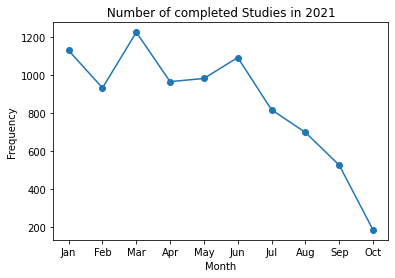

In [0]:
import matplotlib.pyplot as plt

x = completed_trials_sort_yr_split_red_month_take.map(lambda x : x[0]).collect()
y = completed_trials_sort_yr_split_red_month_take.map(lambda x : x[1]).collect()

# create a scatter plot
plt.plot(x, y , marker = 'o')
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title(" Number of completed Studies in 2021 ")
plt.show()

In [0]:
print(completed_trials_sort_yr_split_red_month_coll)

[('Jan', 1131), ('Feb', 934), ('Mar', 1227), ('Apr', 967), ('May', 984), ('Jun', 1094), ('Jul', 819), ('Aug', 700), ('Sep', 528), ('Oct', 187)]


In [0]:
rdd_clinical.take(5)

Out[45]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  '']]

In [0]:
#Filter all university sponsored trials that are completed
Uni_sponsor_frequency_rdd = rdd_clinical.filter(lambda row: "University" in row[1] and row[2] == "Completed")

#Transform t5he rdd to a new rdd and append 1 to each rows
Uni_sponsor_frequency_rdd = Uni_sponsor_frequency_rdd.map(lambda row: (row[1], 1))

#Group all rows by the sponsor column and count
Uni_sponsor_frequency_rdd = Uni_sponsor_frequency_rdd.reduceByKey(lambda a, b: a + b)

#Transform the rdd
Uni_sponsor_frequency_rdd = Uni_sponsor_frequency_rdd.map(lambda row: (row[1], row[0]))

#Sort the new rdd by count in descending order
Uni_sponsor_frequency_rdd = Uni_sponsor_frequency_rdd.sortByKey(ascending=False)

#Rearrange the columns
Uni_sponsor_frequency_rdd= Uni_sponsor_frequency_rdd.map(lambda row: (row[1], row[0]))


#Display result
display(Uni_sponsor_frequency_rdd)

PythonRDD[5816] at RDD at PythonRDD.scala:58

In [0]:
#Display top 10 universities
Uni_sponsor_frequency_rdd.take(10)

Out[47]: [('University of California, San Francisco', 978),
 ('Duke University', 957),
 ('Stanford University', 811),
 ('University of Pittsburgh', 778),
 ('University of North Carolina, Chapel Hill', 757),
 ('University of Pennsylvania', 757),
 ('Seoul National University Hospital', 756),
 ('Johns Hopkins University', 722),
 ('Yale University', 710),
 ('University of Michigan', 700)]